<div style="background-color: #00796B; text-align: center; padding: 20px;">
    <p style="color: white; font-size: 36px;">Dog and Cat Classification</p>
    <p style="color: white;">by: Kelompok 4</p>
</div>

<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Library Area</p>
</div>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random
import os
print(os.listdir("dataset"))

['.DS_Store', 'single_prediction', 'test_set', 'training_set']


<div style="background-color: #00796B; text-align: center; padding: 20px; border: 2px solid #4CAF50;">
    <p style="color: white; font-size: 18px;">Training Dataset</p>
</div>

In [2]:
cat_dataset = os.listdir("./dataset/training_set/cats/")
dogs_dataset = os.listdir("./dataset/training_set/dogs/")

cat_dataset.remove('.DS_Store')
dogs_dataset.remove('.DS_Store')

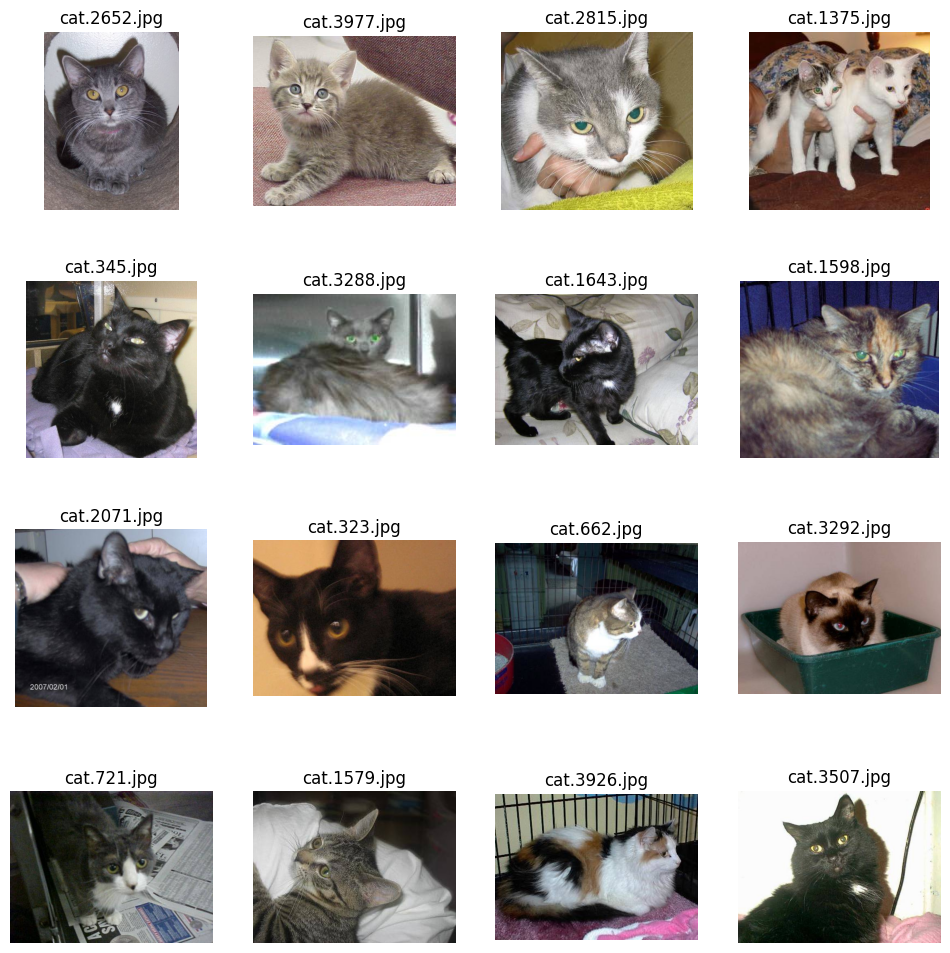

In [3]:
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, n_rows*n_cols):
    index = np.random.randint(0, len(cat_dataset))
    img = plt.imread('./dataset/training_set/cats/' + cat_dataset[index])
    axes[i].imshow(img)
    axes[i].set_title(cat_dataset[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

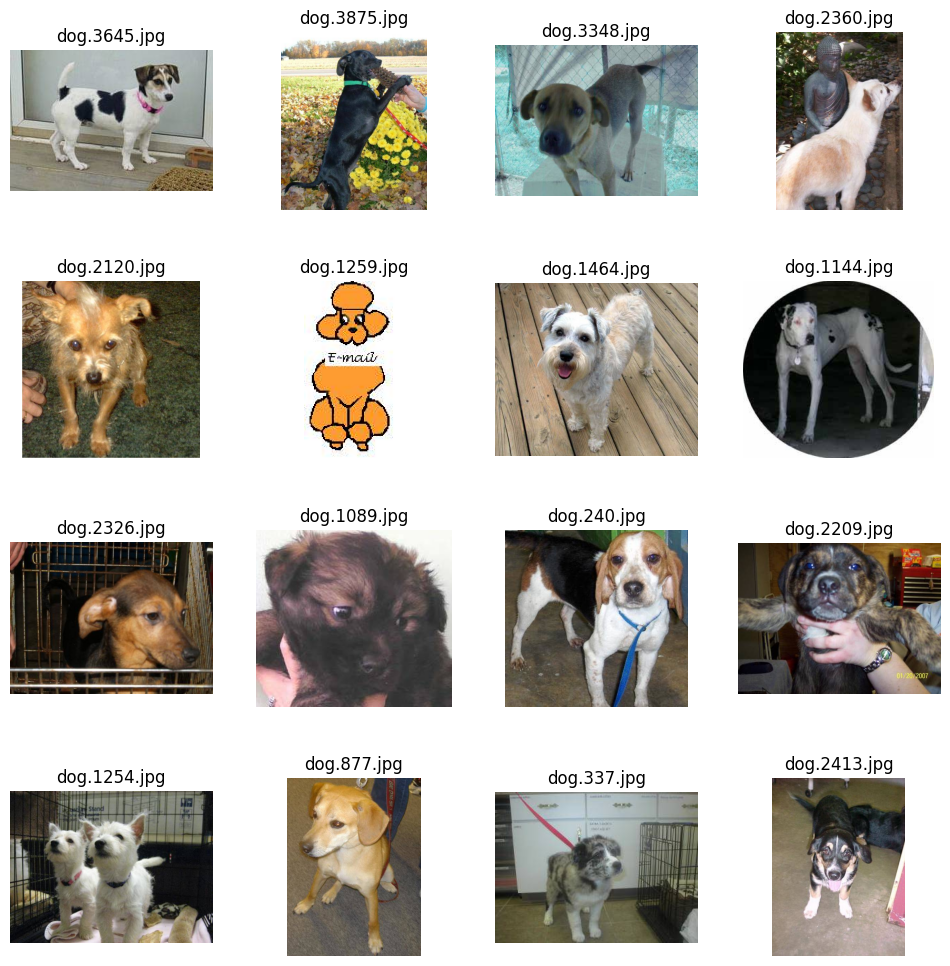

In [4]:
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, n_rows*n_cols):
    index = np.random.randint(0, len(dogs_dataset))
    img = plt.imread('./dataset/training_set/dogs/' + dogs_dataset[index])
    axes[i].imshow(img)
    axes[i].set_title(dogs_dataset[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [17]:
plt.imread('./dataset/training_set/cats/cat.1.jpg')

array([[[ 39,  44,  40],
        [ 39,  44,  40],
        [ 40,  44,  43],
        ...,
        [207, 204, 173],
        [202, 199, 166],
        [201, 198, 163]],

       [[ 40,  45,  41],
        [ 40,  45,  41],
        [ 40,  44,  43],
        ...,
        [203, 200, 169],
        [199, 196, 163],
        [197, 194, 159]],

       [[ 40,  45,  41],
        [ 40,  45,  41],
        [ 40,  44,  43],
        ...,
        [199, 195, 166],
        [199, 194, 164],
        [199, 194, 162]],

       ...,

       [[ 32,  30,  31],
        [ 30,  28,  29],
        [ 26,  24,  25],
        ...,
        [ 36,  23,  17],
        [ 41,  30,  24],
        [ 57,  46,  40]],

       [[ 32,  30,  31],
        [ 30,  28,  29],
        [ 26,  24,  25],
        ...,
        [ 42,  29,  21],
        [ 44,  34,  25],
        [ 55,  45,  36]],

       [[ 32,  30,  31],
        [ 29,  27,  28],
        [ 25,  23,  24],
        ...,
        [ 51,  38,  30],
        [ 42,  32,  23],
        [ 40,  30,  21]]

CNN Model Generation Area

In [7]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 96s 380ms/step - loss: 0.6666 - accuracy: 0.5974 - val_loss: 0.6281 - val_accuracy: 0.6420
Epoch 2/25
250/250 [==============================] - 31s 122ms/step - loss: 0.5976 - accuracy: 0.6777 - val_loss: 0.6092 - val_accuracy: 0.6675
Epoch 3/25
250/250 [==============================] - 31s 123ms/step - loss: 0.5524 - accuracy: 0.7206 - val_loss: 0.5397 - val_accuracy: 0.7330
Epoch 4/25
250/250 [==============================] - 31s 123ms/step - loss: 0.5211 - accuracy: 0.7440 - val_loss: 0.4869 - val_accuracy: 0.7690
Epoch 5/25
250/250 [==============================] - 31s 124ms/step - loss: 0.5020 - accuracy: 0.7595 - val_loss: 0.5240 - val_accuracy: 0.7475
Epoch 6/25
250/250 [==============================] - 31s 126ms/step - loss: 0.4857 - accuracy: 0.7625 - val_loss: 0.5304 - val_accuracy: 0.7465
Epoch 7/25
250/250 [==============================] - 32s 126ms/step - loss: 0.4653 - accuracy: 0.7774 - val_loss: 0.4937 - val_ac

In [9]:
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 189ms/step


In [10]:
print(prediction)

dog


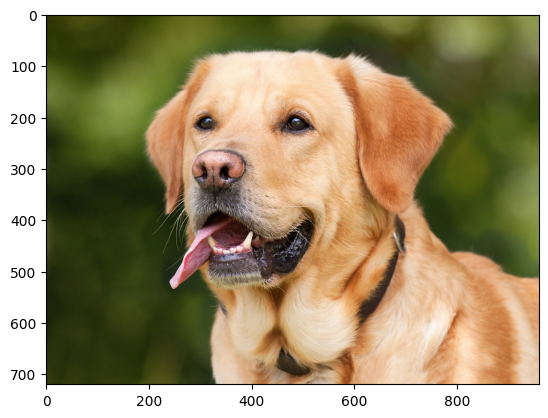

In [12]:
# show the image
img = plt.imread('dataset/single_prediction/cat_or_dog_1.jpg')
plt.imshow(img)

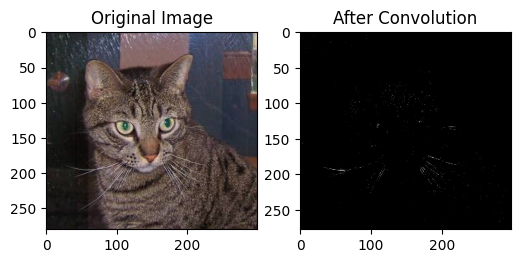

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D

# Load the image
image_path = './dataset/training_set/cats/cat.1.jpg'
image = plt.imread(image_path)

# Convert the image to tf.float32
image = tf.convert_to_tensor(image, dtype=tf.float32)

# Display the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image.numpy().astype("uint8"))

# Create a Conv2D layer with the same parameters as your model
conv_layer = Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3), kernel_initializer='he_normal')

# Apply convolution to the image
conv_image = conv_layer(image[tf.newaxis, ...])  # Add a batch dimension

# Display the result after convolution
plt.subplot(1, 2, 2)
plt.title("After Convolution")
plt.imshow(conv_image[0, ..., 0], cmap='gray')

plt.show()